In [1]:
# import libraries and modules

import torch

from setup import *

from rot_matrix import *

from rot_matrix_analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# 1. TEAPOT

## Teapot (convergence)

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


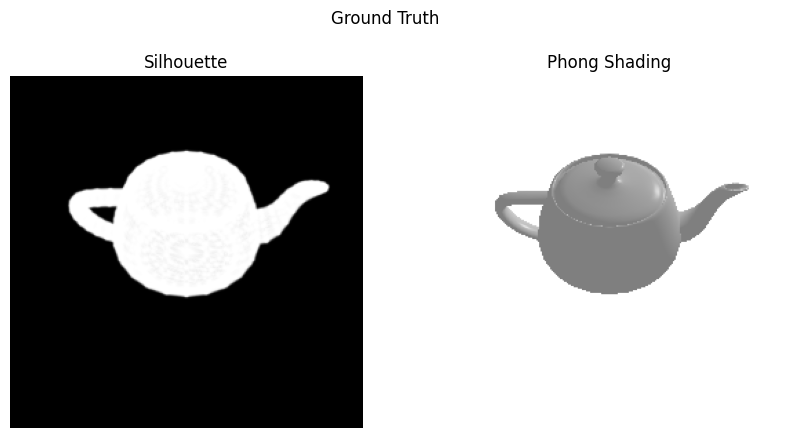

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 50,
    "azim": 0
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

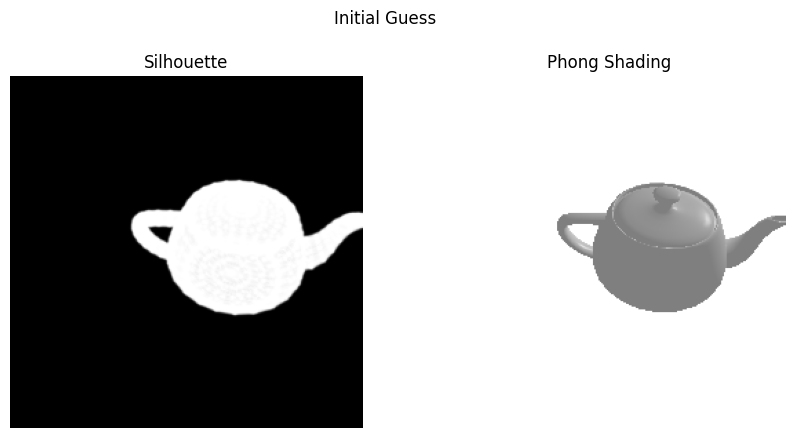

In [5]:
params = {
    "dist": 2.7,
    "elev": 45,
    "azim": 5
}

variances = {
    "dist": 0,
    "elev": 0.1,
    "azim": 0.1
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)



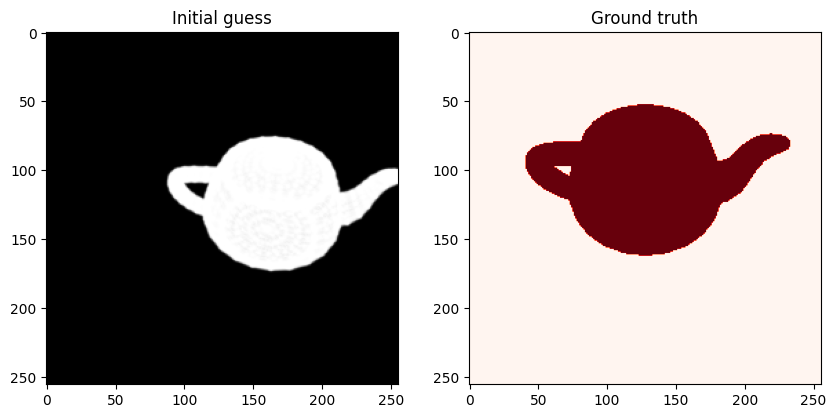

  0%|          | 0/30 [00:10<?, ?it/s]

iteration: 0, loss: 9356.0166015625


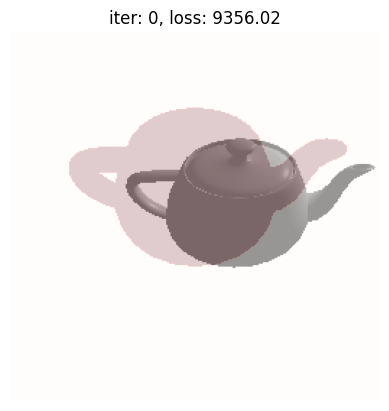

  7%|▋         | 2/30 [00:21<04:57, 10.61s/it]

iteration: 1, loss: 7618.0751953125


 10%|█         | 3/30 [00:31<04:43, 10.51s/it]

iteration: 2, loss: 5990.0341796875


 13%|█▎        | 4/30 [00:42<04:35, 10.60s/it]

iteration: 3, loss: 4124.1796875


 17%|█▋        | 5/30 [00:53<04:26, 10.68s/it]

iteration: 4, loss: 3210.74951171875


 17%|█▋        | 5/30 [01:04<04:26, 10.68s/it]

iteration: 5, loss: 2918.29931640625


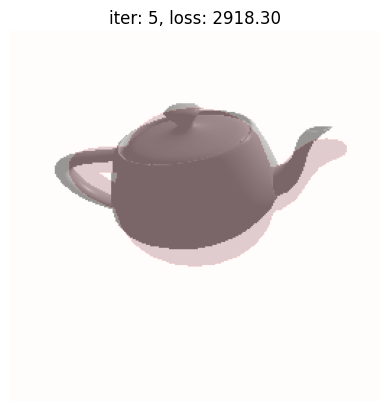

 23%|██▎       | 7/30 [01:16<04:15, 11.09s/it]

iteration: 6, loss: 2952.643798828125


 27%|██▋       | 8/30 [01:25<03:53, 10.63s/it]

iteration: 7, loss: 4831.048828125


 30%|███       | 9/30 [01:35<03:38, 10.42s/it]

iteration: 8, loss: 4505.54052734375


 33%|███▎      | 10/30 [01:46<03:28, 10.44s/it]

iteration: 9, loss: 4095.3876953125


 33%|███▎      | 10/30 [01:56<03:28, 10.44s/it]

iteration: 10, loss: 3989.975341796875


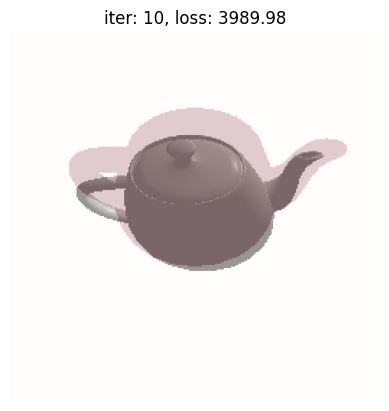

 40%|████      | 12/30 [02:07<03:09, 10.54s/it]

iteration: 11, loss: 3837.679443359375


 43%|████▎     | 13/30 [02:18<03:01, 10.66s/it]

iteration: 12, loss: 3445.822265625


 47%|████▋     | 14/30 [02:29<02:54, 10.88s/it]

iteration: 13, loss: 2720.350341796875


 50%|█████     | 15/30 [02:41<02:46, 11.10s/it]

iteration: 14, loss: 1886.99560546875


 50%|█████     | 15/30 [02:53<02:46, 11.10s/it]

iteration: 15, loss: 1475.0001220703125


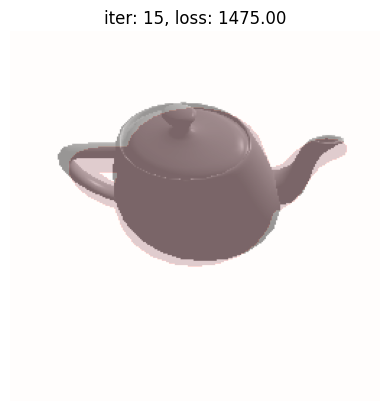

 57%|█████▋    | 17/30 [03:05<02:30, 11.59s/it]

iteration: 16, loss: 1964.8165283203125


 60%|██████    | 18/30 [03:17<02:20, 11.69s/it]

iteration: 17, loss: 2336.37939453125


 63%|██████▎   | 19/30 [03:29<02:08, 11.72s/it]

iteration: 18, loss: 2271.233154296875


 67%|██████▋   | 20/30 [03:39<01:52, 11.24s/it]

iteration: 19, loss: 3863.691162109375


 67%|██████▋   | 20/30 [03:49<01:52, 11.24s/it]

iteration: 20, loss: 3652.624267578125


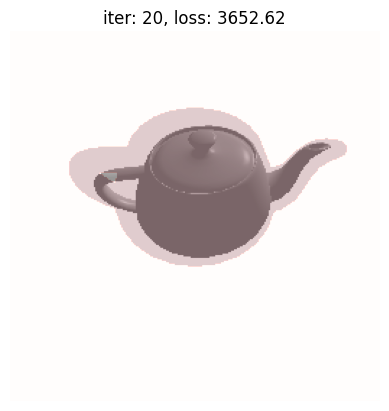

 73%|███████▎  | 22/30 [04:01<01:28, 11.10s/it]

iteration: 21, loss: 3150.73388671875


 77%|███████▋  | 23/30 [04:12<01:18, 11.20s/it]

iteration: 22, loss: 2641.54150390625


 80%|████████  | 24/30 [04:25<01:09, 11.51s/it]

iteration: 23, loss: 2416.601806640625


 83%|████████▎ | 25/30 [04:38<00:59, 11.99s/it]

iteration: 24, loss: 2187.24462890625


 83%|████████▎ | 25/30 [04:51<00:59, 11.99s/it]

iteration: 25, loss: 1618.5367431640625


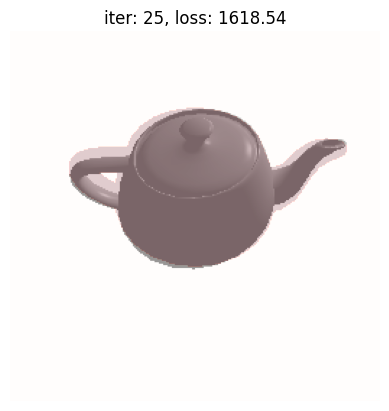

 90%|█████████ | 27/30 [05:04<00:37, 12.53s/it]

iteration: 26, loss: 1107.35791015625


 93%|█████████▎| 28/30 [05:15<00:24, 12.11s/it]

iteration: 27, loss: 1355.5567626953125


 97%|█████████▋| 29/30 [05:27<00:11, 11.98s/it]

iteration: 28, loss: 1702.0657958984375


100%|██████████| 30/30 [05:38<00:00, 11.29s/it]


iteration: 29, loss: 1566.64697265625


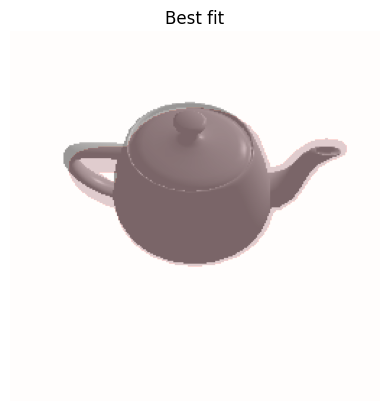

In [6]:
losses, parameter_updates, R_min, T_min = train_rotation_matrix_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

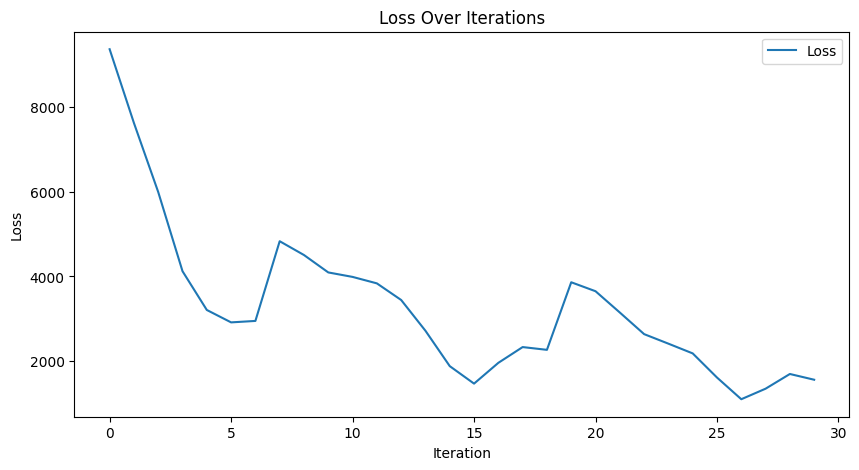

In [7]:
plot_losses(losses)

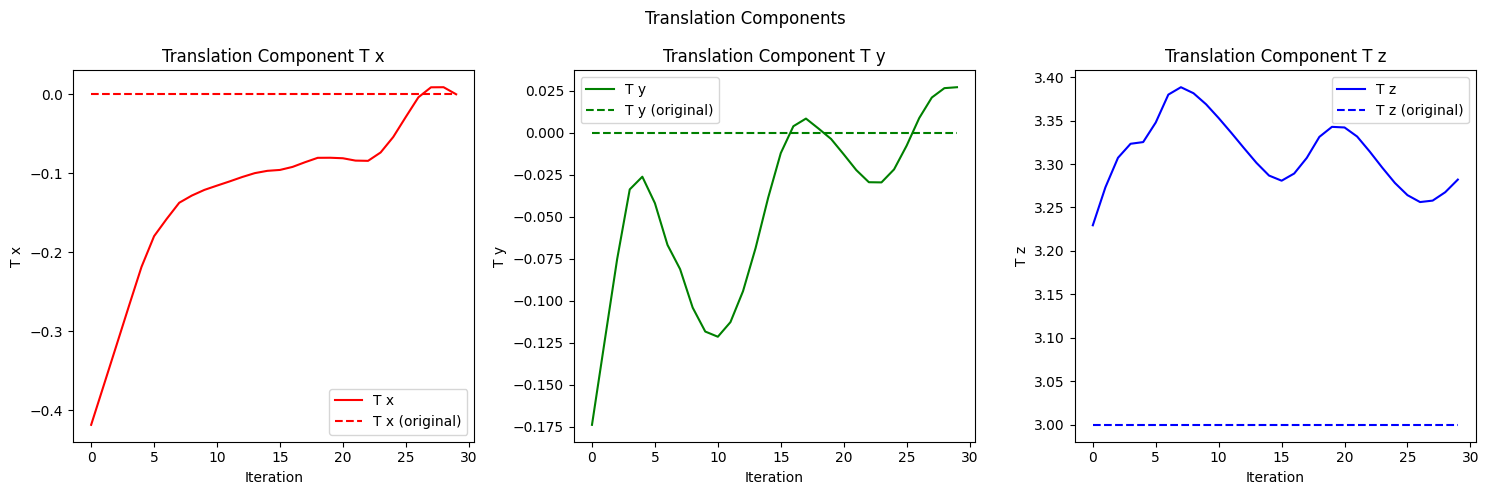

In [8]:
plot_translations(T_gt, parameter_updates)

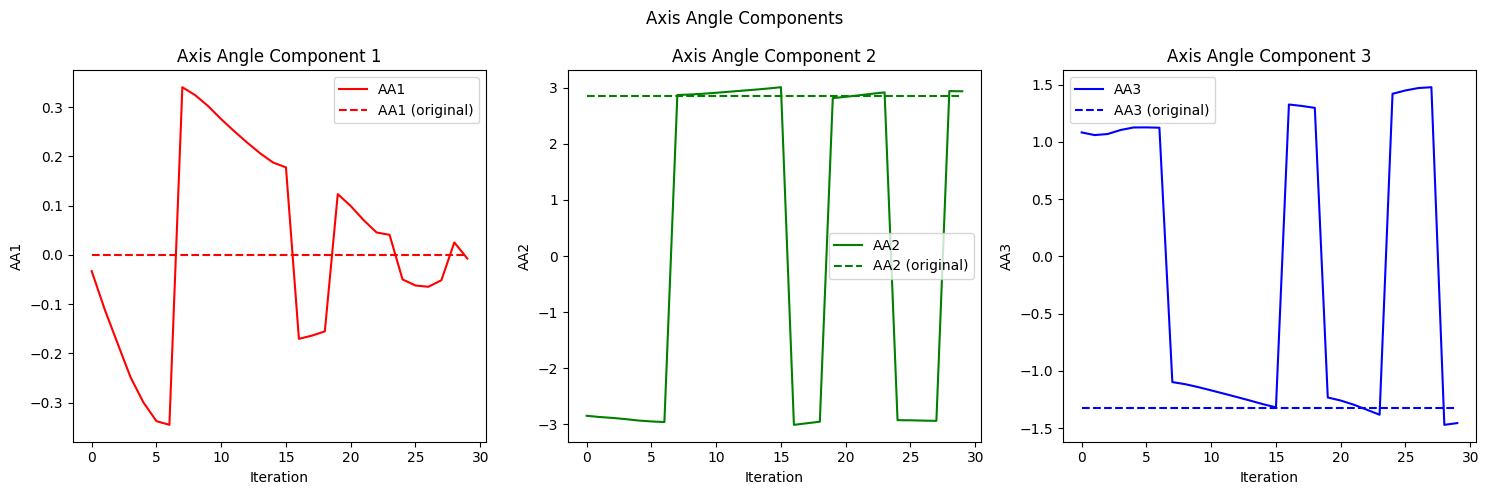

In [9]:
plot_axis_angles(R_gt, parameter_updates)

## Teapot (Another Initialisation)

In [10]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
obj_name = obj_name + "_1"
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot_1


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


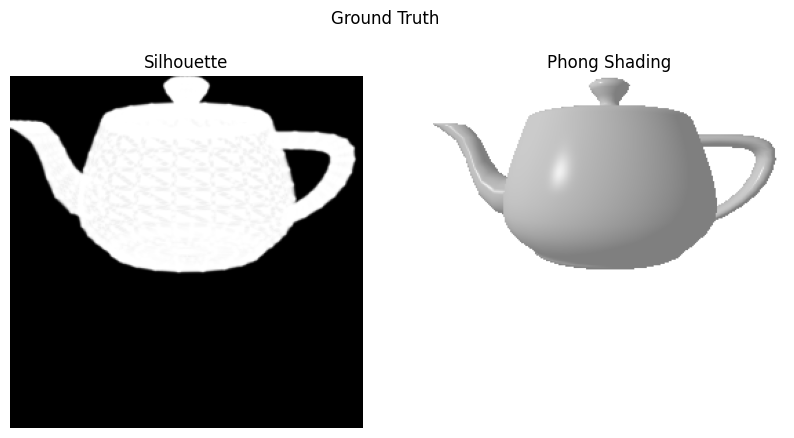

In [11]:
# Ground truth parameters

params = {
    "dist": -2,
    "elev": -15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

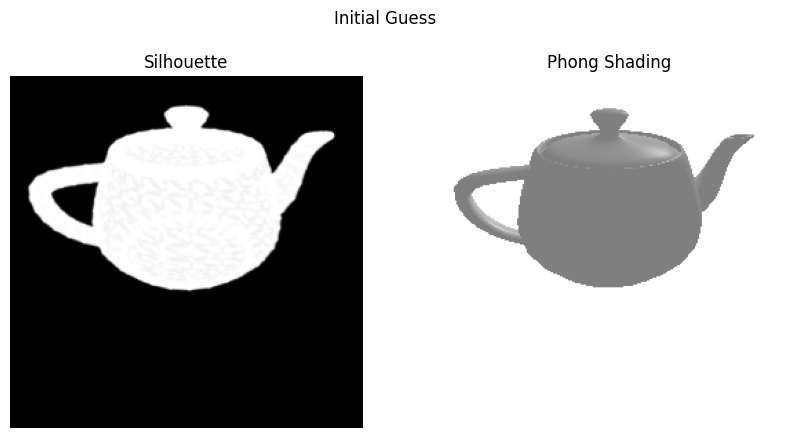

In [12]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# Read the initial guess from the file

R_init = torch.tensor(np.load("data/teapot_R_init_2.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_2.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

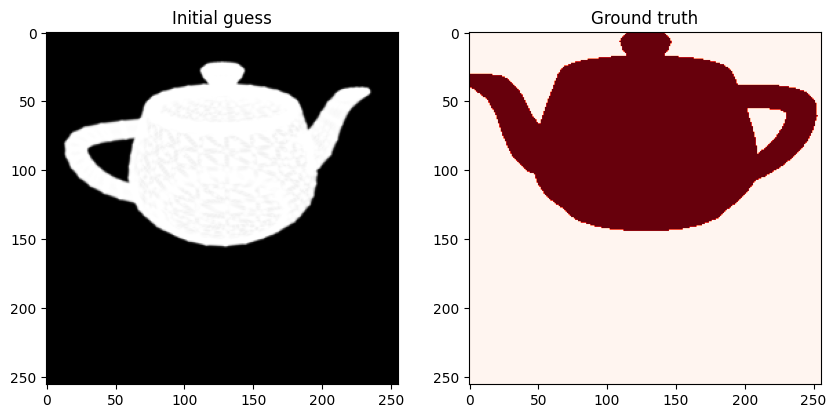

  0%|          | 0/25 [00:11<?, ?it/s]

iteration: 0, loss: 8822.3720703125


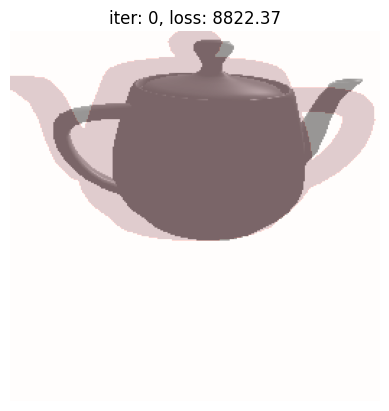

  8%|▊         | 2/25 [00:24<04:41, 12.26s/it]

iteration: 1, loss: 6504.11767578125


 12%|█▏        | 3/25 [00:37<04:35, 12.50s/it]

iteration: 2, loss: 5869.0986328125


 16%|█▌        | 4/25 [00:49<04:22, 12.51s/it]

iteration: 3, loss: 6428.17529296875


 20%|██        | 5/25 [01:02<04:12, 12.62s/it]

iteration: 4, loss: 5793.91064453125


 20%|██        | 5/25 [01:15<04:12, 12.62s/it]

iteration: 5, loss: 5215.3720703125


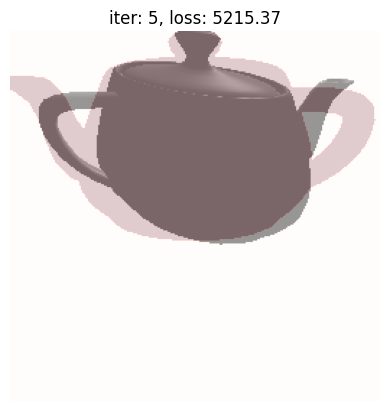

 28%|██▊       | 7/25 [01:28<03:49, 12.75s/it]

iteration: 6, loss: 5250.7919921875


 32%|███▏      | 8/25 [01:40<03:33, 12.54s/it]

iteration: 7, loss: 7645.81591796875


 36%|███▌      | 9/25 [01:52<03:16, 12.31s/it]

iteration: 8, loss: 7355.29150390625


 40%|████      | 10/25 [02:04<03:02, 12.17s/it]

iteration: 9, loss: 6691.3447265625


 40%|████      | 10/25 [02:16<03:02, 12.17s/it]

iteration: 10, loss: 6181.19873046875


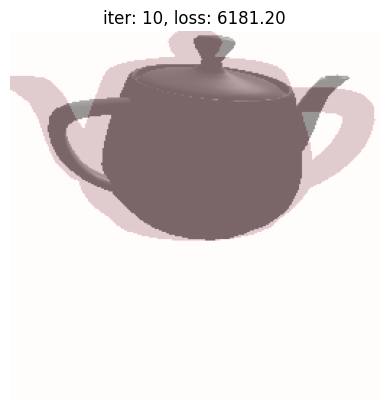

 48%|████▊     | 12/25 [02:29<02:40, 12.38s/it]

iteration: 11, loss: 5474.13037109375


 52%|█████▏    | 13/25 [02:41<02:28, 12.33s/it]

iteration: 12, loss: 4943.7392578125


 56%|█████▌    | 14/25 [02:53<02:16, 12.37s/it]

iteration: 13, loss: 5394.56005859375


 60%|██████    | 15/25 [03:06<02:04, 12.48s/it]

iteration: 14, loss: 5656.14794921875


 60%|██████    | 15/25 [03:19<02:04, 12.48s/it]

iteration: 15, loss: 5616.0908203125


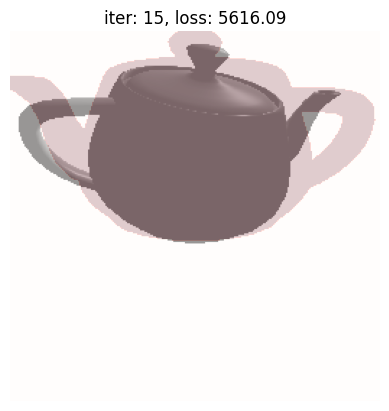

 68%|██████▊   | 17/25 [03:31<01:40, 12.51s/it]

iteration: 16, loss: 6140.232421875


 72%|███████▏  | 18/25 [03:43<01:26, 12.36s/it]

iteration: 17, loss: 5847.89892578125


 76%|███████▌  | 19/25 [03:56<01:13, 12.28s/it]

iteration: 18, loss: 5442.21435546875


 80%|████████  | 20/25 [04:08<01:01, 12.25s/it]

iteration: 19, loss: 5315.1171875


 80%|████████  | 20/25 [04:20<01:01, 12.25s/it]

iteration: 20, loss: 5291.2236328125


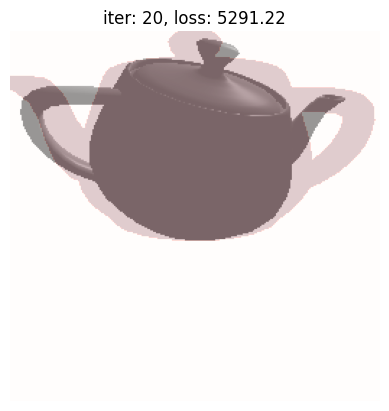

 88%|████████▊ | 22/25 [04:33<00:36, 12.31s/it]

iteration: 21, loss: 5631.7763671875


 92%|█████████▏| 23/25 [04:45<00:24, 12.39s/it]

iteration: 22, loss: 5374.4599609375


 96%|█████████▌| 24/25 [04:58<00:12, 12.58s/it]

iteration: 23, loss: 5226.94677734375


100%|██████████| 25/25 [05:11<00:00, 12.46s/it]


iteration: 24, loss: 5125.71533203125


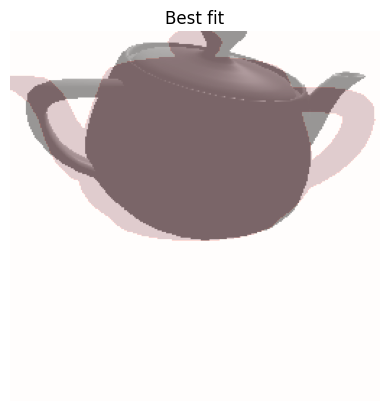

In [13]:
losses, parameter_updates, R_min, T_min = train_rotation_matrix_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 25, device)

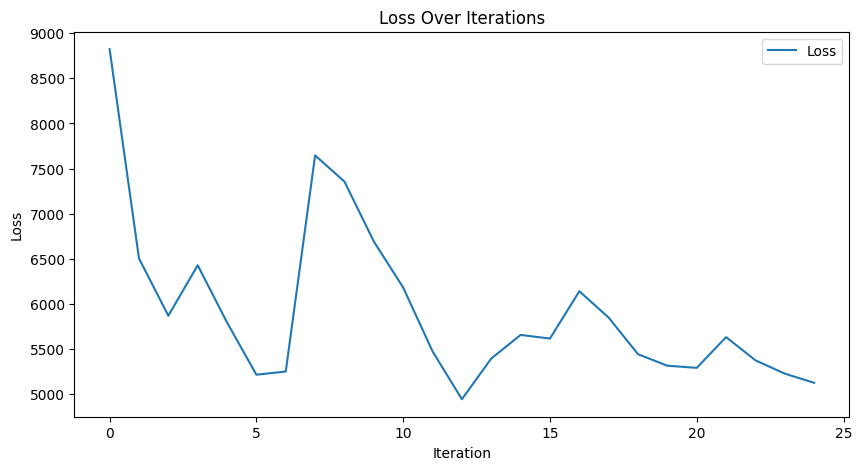

In [17]:
plot_losses(losses)

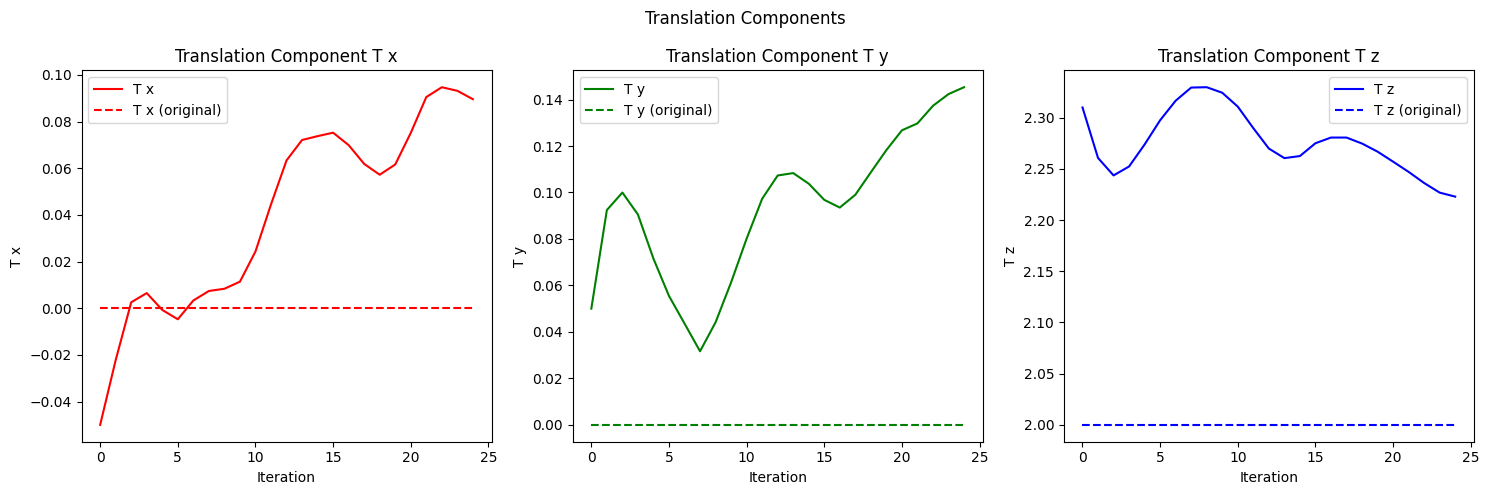

In [18]:
plot_translations(T_gt, parameter_updates)

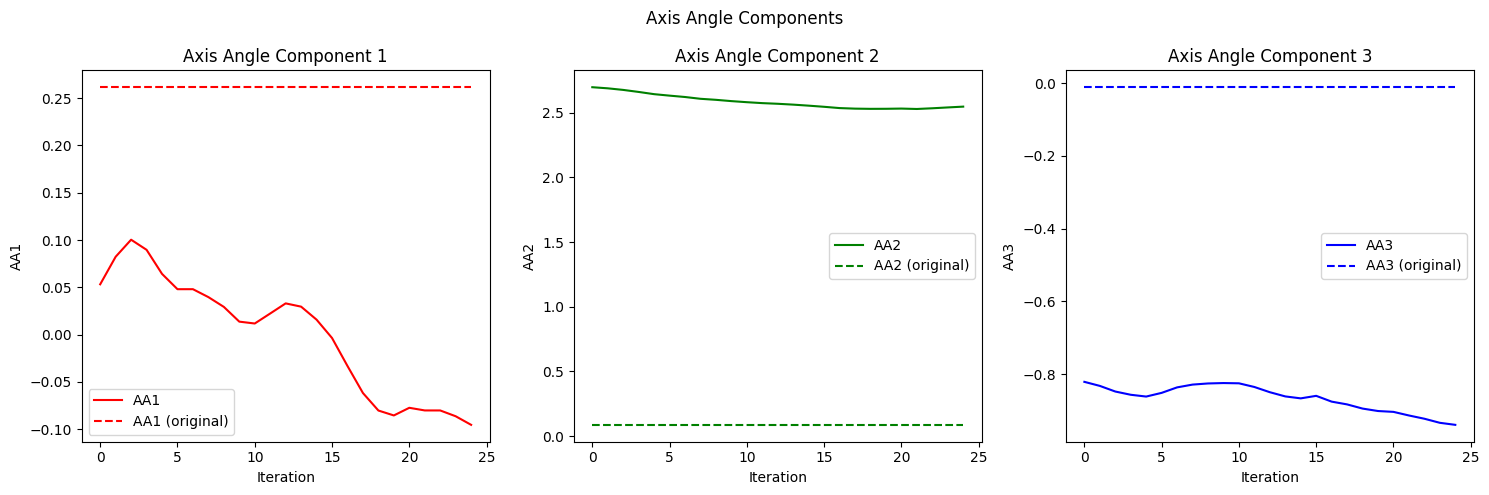

In [19]:
plot_axis_angles(R_gt, parameter_updates)

# 2. Bunny

In [20]:
bunny_path = "data/bunny.obj"
obj_name = bunny_path.split(".")[-2].split("/")[-1]
obj_name = obj_name
print("Loading", obj_name)
bunny_mesh = load_mesh(bunny_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading bunny


In [ ]:
# Ground truth parameters

params = {
    "dist": -1.5,
    "elev": 270,
    "azim": 15
}

silhoutte_gt_bunny, phong_gt_bunny, R_gt, T_gt = get_ground_truth(bunny_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_bunny, phong_gt_bunny)

NameError: name 'get_ground_truth' is not defined

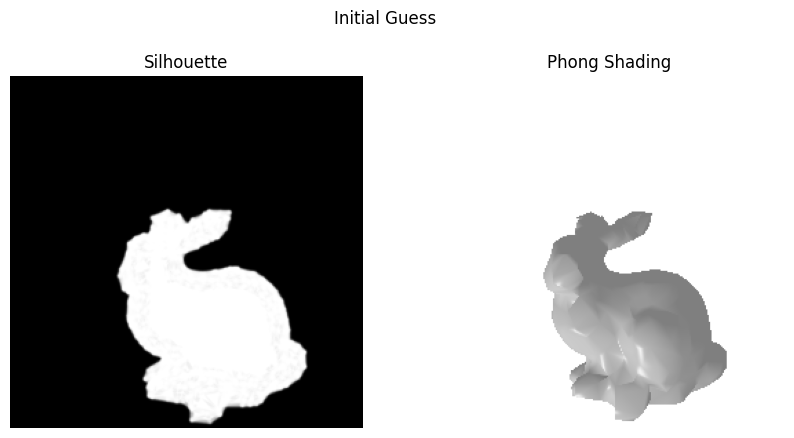

In [12]:
variances = {
    "dist": 0,
    "elev": 5,
    "azim": 5
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # save R and T to a file
# np.save("data/bunny_R_init.npy", R_init.cpu().numpy())
# np.save("data/bunny_T_init.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/bunny_R_init.npy")).to(device)
T_init = torch.tensor(np.load("data/bunny_T_init.npy")).to(device)

plot_initial_guess(bunny_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

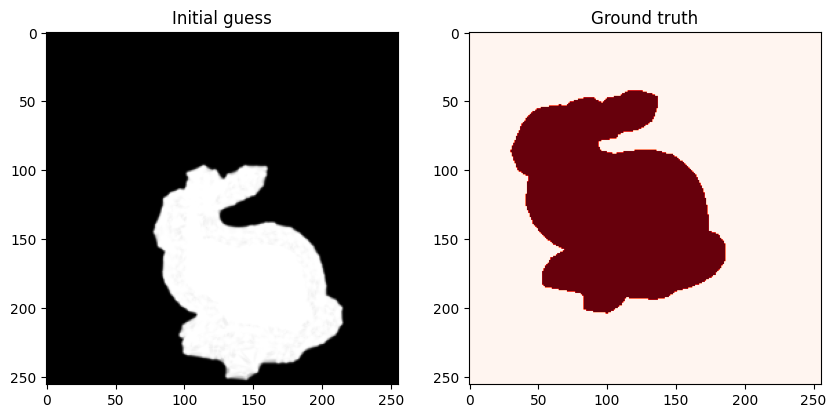

  0%|          | 0/10 [00:12<?, ?it/s]

iteration: 0, loss: 14872.568359375


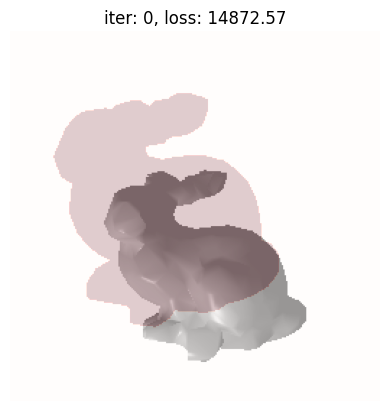

 20%|██        | 2/10 [00:24<01:37, 12.22s/it]

iteration: 1, loss: 11423.6708984375


 30%|███       | 3/10 [00:36<01:24, 12.10s/it]

iteration: 2, loss: 8442.3544921875


 40%|████      | 4/10 [00:48<01:12, 12.16s/it]

iteration: 3, loss: 6280.349609375


 50%|█████     | 5/10 [01:00<01:00, 12.18s/it]

iteration: 4, loss: 5523.39599609375


 60%|██████    | 6/10 [01:12<00:48, 12.05s/it]

iteration: 5, loss: 5882.134765625


 70%|███████   | 7/10 [01:24<00:36, 12.06s/it]

iteration: 6, loss: 5733.02734375


 80%|████████  | 8/10 [01:37<00:24, 12.12s/it]

iteration: 7, loss: 5094.4169921875


 90%|█████████ | 9/10 [01:48<00:12, 12.03s/it]

iteration: 8, loss: 4973.32080078125


100%|██████████| 10/10 [02:00<00:00, 12.10s/it]

iteration: 9, loss: 5419.3857421875


In [13]:
losses, parameter_updates, R_min, T_min = train_rotation_matrix_model(bunny_mesh, silhoutte_gt_bunny, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 10, device)